In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (Non)Linear IA Models

In [2]:
from linear_alingment_models import LinearAlignmentModel as LA
from linear_alingment_models import NonLinearAlignmentModel as NLA
from hrh_model import HRH, HRHstar

In [3]:
r = np.logspace(-1,2.2,50)

la = LA() 
xi_1 = la.ii_plus(r)

nla = NLA() 
xi_2 = nla.ii_plus(r)

hrh = HRH()
xi_3 = hrh.ee_3d(r)

hrh = HRHstar()
xi_4 = hrh.ee_3d(r)

TypeError: __init__() got an unexpected keyword argument 'NonLinear'

In [ ]:
plt.figure()
l1, = plt.plot(r, xi_1, '-')
l2, = plt.plot(r, xi_2, ':')
l3, = plt.plot(r, xi_3, '--')
l4, = plt.plot(r, xi_4, '-.')
plt.yscale('log')
plt.xscale('log')
plt.ylim([10**(-7),10**(-1)])
plt.xlim([0.1,100])
plt.xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$w_{++}~[h^{-1}{\rm Mpc}]$')
plt.legend([l1, l2, l3, l4],['LA', 'NLA', 'HRH', 'HRH*'], frameon=False, loc='upper right', fontsize=10)
plt.show()

In [5]:
rp = np.logspace(-1,2.2,50)

la = LA() 
xi_1 = la.ii_plus_projected(r)

nla = NLA() 
xi_2 = nla.ii_plus_projected(r)

hrh = HRHstar(sample='SDSS L3-L6')
xi_3 = hrh.ii_plus_projected(r)

/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


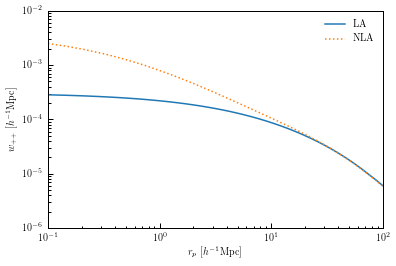

In [6]:
plt.figure()
l1, = plt.plot(rp, xi_1, '-')
l2, = plt.plot(rp, xi_2, ':')
plt.yscale('log')
plt.xscale('log')
plt.ylim([10**(-6),10**(-2)])
plt.xlim([0.1,100])
plt.xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$w_{++}~[h^{-1}{\rm Mpc}]$')
plt.legend([l1, l2],['LA', 'NLA'], frameon=False, loc='upper right', fontsize=10)
plt.show()

In [19]:
hrh.params

{u'A': 0.012, u'B': 1.5, u'R': 0.87, u'gamma': 1.8, u'r0': 5.25}